In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 831s 5us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

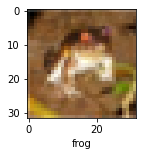

In [13]:
plot_sample(X_train, y_train, 0)

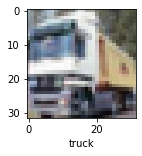

In [14]:
plot_sample(X_train, y_train, 1)

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8136 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6253 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5425 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4836 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4314 - accuracy: 0.4979


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.48      0.51      1000
           1       0.44      0.79      0.56      1000
           2       0.39      0.26      0.31      1000
           3       0.39      0.28      0.32      1000
           4       0.41      0.47      0.44      1000
           5       0.48      0.27      0.35      1000
           6       0.46      0.66      0.54      1000
           7       0.65      0.48      0.55      1000
           8       0.47      0.76      0.58      1000
           9       0.62      0.26      0.37      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [18]:
#Build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN
#CNN's are best for image classification and gives superb accuracy
#Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while preserving the features

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.4800 - accuracy: 0.4695
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1187 - accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9917 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9150 - accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8505 - accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7918 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7461 - accuracy: 0.7403
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7047 - accuracy: 0.7538
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6604 - accuracy: 0.7719
Epoch 10/10
1563/1563 [==============================] - 24s 15m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0254 - accuracy: 0.6691


[1.0253955125808716, 0.6690999865531921]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.07225636e-04, 3.32148993e-05, 2.14732904e-03, 8.31326962e-01,
        3.18624405e-03, 2.61235721e-02, 1.10141747e-01, 5.93323875e-06,
        2.64209770e-02, 6.81913252e-06],
       [1.36097614e-02, 3.14455759e-03, 2.80348740e-05, 1.25909025e-06,
        5.80778590e-07, 1.54897464e-08, 4.01865208e-09, 4.57708609e-08,
        9.82337475e-01, 8.78263148e-04],
       [1.80019528e-01, 3.19424957e-01, 4.47530067e-03, 1.33096492e-02,
        4.18651151e-03, 1.47819705e-03, 5.21831075e-03, 4.73269168e-03,
        4.12524730e-01, 5.46301156e-02],
       [8.39826941e-01, 1.77822951e-02, 3.67587362e-03, 1.02974649e-03,
        9.90203116e-04, 2.17227489e-06, 1.63928446e-04, 1.13556416e-04,
        1.36336133e-01, 7.90549311e-05],
       [3.80636084e-06, 8.38088354e-08, 2.65512578e-02, 5.07326089e-02,
        1.57057673e-01, 7.58473948e-03, 7.58062840e-01, 4.94948245e-06,
        1.98899306e-06, 7.08279089e-08]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

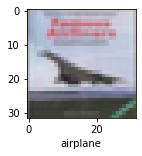

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'